# A Comprehensive Guide to Histogram Bin Selection Methods

## Table of Contents
1. [Introduction](#introduction)
2. [Classical Methods](#classical-methods)
3. [Robust Methods](#robust-methods)
4. [Information-Theoretic Methods](#information-theoretic-methods)
5. [Advanced Statistical Methods](#advanced-statistical-methods)
6. [Bayesian Methods](#bayesian-methods)
7. [Ensemble Approaches](#ensemble-approaches)
8. [Implementation Guidelines](#implementation-guidelines)

---

## Introduction

The histogram is one of the most fundamental tools in data visualization and exploratory data analysis. However, choosing the optimal number of bins remains a critical decision that significantly affects the interpretation of data patterns. Too few bins obscure important details (undersmoothing), while too many bins create noise and spurious patterns (oversmoothing).

This guide presents a comprehensive overview of bin selection methods, from classical heuristics to modern Bayesian approaches, providing both theoretical foundations and practical implementations.

### The Bin Selection Problem

Given a dataset $X = \{x_1, x_2, \ldots, x_n\}$, we want to partition the data range $[x_{\min}, x_{\max}]$ into $k$ bins such that the resulting histogram optimally represents the underlying probability density function.

**Mathematical Formulation:**
$$\text{Minimize: } \quad L(k) = \text{Loss}(\text{True Distribution}, \text{Histogram}(k))$$
$$\text{Subject to: } \quad k \in \{1, 2, \ldots, k_{\max}\}$$

---

## Classical Methods

### 1. Sturges' Rule (1926)

**Historical Context:** Herbert Sturges proposed this rule assuming data follows a normal distribution.

**Formula:**
$$k = \lceil \log_2(n) + 1 \rceil$$

**Derivation:**
Based on the binomial distribution approximation to normal distribution. For $n$ trials, the number of distinct outcomes is approximately $2^k \approx n$, solving for $k$:

$$2^k = n \Rightarrow k = \log_2(n)$$

Adding 1 accounts for practical considerations.

**Pseudocode:**
```
function sturges_bins(data):
    n = length(data)
    k = ceiling(log2(n) + 1)
    return k
```

**Intuition & When It Works:**
Imagine you're sorting coins into jars. Sturges' rule is like having a pre-made set of jars whose number depends only on how many coins you have, not what types they are. This works well when your coins are all similar (normal distribution), but fails when you have a mix of pennies, nickels, and rare collectibles (skewed or multimodal data).

**The "Doubling" Logic:** The rule essentially says "if I double my data, I need one more bin." This makes sense for well-behaved data where more observations just confirm the same pattern, but breaks down when more data reveals new patterns.

**Real-world Analogy:** Like using the same number of categories to organize any collection, regardless of what you're organizing. Works for organizing books by genre (fairly uniform categories), fails for organizing a mixed garage sale (highly variable items).

**Advantages:**
- Computationally trivial
- Theoretical foundation
- Good baseline method
- Consistent and reproducible

**Disadvantages:**
- Assumes normal distribution
- Often too conservative (too few bins)
- Doesn't consider data characteristics
- Can miss important features in complex data

---

### 2. Square Root Rule

**Formula:**
$$k = \lceil \sqrt{n} \rceil$$

**Derivation:**
Empirical rule balancing resolution and noise. The square root relationship provides a moderate growth rate with sample size.

**Pseudocode:**
```
function sqrt_bins(data):
    n = length(data)
    k = ceiling(sqrt(n))
    return k
```

**Intuition & When It Works:**
Think of this as the "Goldilocks" rule - not too few, not too many, but "just right" for many situations. It's like deciding how many shelves to put in a bookcase: √n gives you a reasonable number that grows slowly as your collection grows.

**The Growth Rate Logic:** Unlike Sturges (logarithmic growth), square root grows faster, giving more bins for large datasets. This makes intuitive sense - if you have 100 data points, you might want 10 bins, but if you have 10,000 points, you probably want more than 14 bins (Sturges) but less than 100.

**Visual Thinking:** Imagine looking at data through a telescope. Square root rule adjusts the "zoom level" - more data points mean you can afford to zoom in a bit more (more bins) without getting lost in noise.

**When It Shines:** Particularly good for medium-sized datasets (100-10,000 points) where Sturges is too conservative but sophisticated methods might be overkill.

---

## Robust Methods

### 3. Scott's Rule (1979)

**Theoretical Foundation:** Based on minimizing the integrated mean squared error (IMSE) for kernel density estimation.

**Formula:**
$$h = \frac{3.5\sigma}{n^{1/3}}$$
$$k = \left\lceil \frac{x_{\max} - x_{\min}}{h} \right\rceil$$

**Derivation:**
For a histogram as an estimator of probability density, Scott derived the optimal bin width by minimizing:

$$\text{IMSE}(h) = \int [\hat{f}(x) - f(x)]^2 dx$$

where $\hat{f}(x)$ is the histogram estimator and $f(x)$ is the true density.

**Mathematical Details:**
The IMSE can be decomposed into bias and variance components:
$$\text{IMSE}(h) = \text{Bias}^2 + \text{Variance}$$

For large $n$ and smooth densities:
- $\text{Bias}^2 \propto h^4$
- $\text{Variance} \propto \frac{1}{nh}$

Minimizing: $\frac{d}{dh}[\text{IMSE}(h)] = 0$ yields $h \propto n^{-1/3}$

**Pseudocode:**
```
function scott_bins(data):
    n = length(data)
    sigma = standard_deviation(data)
    h = 3.5 * sigma / (n^(1/3))
    range = max(data) - min(data)
    k = ceiling(range / h)
    return max(1, k)
```

**Intuition & Deep Understanding:**
Scott's rule is like a master craftsman who knows that the right tool size depends on both the material (data spread via σ) and the job scale (sample size via n^1/3). It's solving a fundamental trade-off: make bins too wide and you lose important details (bias), make them too narrow and you see mostly noise (variance).

**The "Smooth Operator" Philosophy:** This method assumes your data comes from a smooth, continuous process. It's like adjusting the resolution on a camera - Scott's rule finds the sweet spot where you capture real features without amplifying noise.

**Why n^(-1/3)?** This magic exponent comes from calculus of variations. As you get more data, you can afford slightly narrower bins, but the improvement slows down (cube root, not square root or linear). It's the optimal rate that balances the competing forces of bias and variance.

**Manufacturing Analogy:** Like setting the precision of a measuring instrument. Too coarse (few bins) and you miss important variations; too fine (many bins) and you measure mostly noise. Scott finds the precision that minimizes total measurement error.

**When It Excels:** Perfect for data that behaves like physical measurements - continuous, smooth processes with some random noise. Think sensor readings, biological measurements, or economic indicators.

**When It Struggles:** Fails with discrete data, data with sharp discontinuities, or heavy-tailed distributions where σ is misleading.

**Advantages:**
- Theoretically optimal for smooth distributions
- Scales appropriately with sample size
- Minimizes mean squared error
- Works well for continuous data

**Disadvantages:**
- Assumes smooth, normal-like distributions
- Sensitive to outliers (through σ)
- Can over-smooth multimodal data
- Poor performance with heavy tails

---

### 4. Freedman-Diaconis Rule (1981)

**Motivation:** Robust alternative to Scott's rule that uses interquartile range instead of standard deviation.

**Formula:**
$$h = \frac{2 \cdot \text{IQR}}{n^{1/3}}$$
$$k = \left\lceil \frac{x_{\max} - x_{\min}}{h} \right\rceil$$

where $\text{IQR} = Q_3 - Q_1$ (75th percentile - 25th percentile).

**Derivation:**
Similar to Scott's derivation but uses IQR as a robust scale estimator:
$$\text{IQR} \approx 1.35\sigma \text{ for normal data}$$

The factor 2 comes from optimizing the same bias-variance tradeoff with robust statistics.

**Pseudocode:**
```
function freedman_diaconis_bins(data):
    n = length(data)
    Q1, Q3 = percentiles(data, [25, 75])
    iqr = Q3 - Q1
    if iqr == 0:
        return sturges_bins(data)  # fallback
    h = 2 * iqr / (n^(1/3))
    range = max(data) - min(data)
    k = ceiling(range / h)
    return max(1, k)
```

**Intuition & Robust Philosophy:**
If Scott's rule is a precision instrument, Freedman-Diaconis is a rugged field tool. Instead of using the standard deviation (which can be thrown off by a single extreme outlier), it uses the IQR - the range containing the "middle 50%" of your data.

**The "Ignore the Extremes" Strategy:** Imagine you're a teacher setting grade boundaries. Instead of being influenced by the one student who scored 5% or 105% (outliers affecting σ), you focus on the range where most students scored (IQR). This gives you a more stable, representative measure.

**Why This Works:** The IQR captures the "typical" spread of your data without being distorted by extreme values. It's like measuring the width of a river by looking at the normal water level, not the highest flood or lowest drought.

**Real-world Robustness:** Consider income data. A few billionaires can make the standard deviation huge, suggesting you need very wide bins. But the IQR focuses on typical income ranges, giving you bins that reveal meaningful patterns for most people.

**The "Core 50%" Philosophy:** FD rule essentially says "tell me about the typical variability in your data, and I'll set bin widths accordingly." It's looking at the data's "middle class" to understand its natural scale.

**When It's Superior:** 
- Financial data (extreme outliers common)
- Biological measurements (measurement errors)
- Social science data (extreme cases)
- Any data where you care more about typical patterns than extreme events

**The Robustness Trade-off:** By ignoring extremes, it might miss important tail behavior, but it gives you a much more stable, interpretable view of the main data structure.

**Advantages:**
- Robust to outliers and extreme values
- Theoretically grounded in robust statistics
- Works well with skewed distributions
- Stable across different samples from same population
- Excellent for exploratory data analysis

**Disadvantages:**
- May under-represent important tail behavior
- Less sensitive to distributional details
- Can be too conservative for clean, normal data
- Requires data with meaningful quartiles

---

### 5. Doane's Rule (1976)

**Motivation:** Extension of Sturges' rule for skewed distributions.

**Formula:**
$$k = \lceil \log_2(n) + 1 + \log_2(1 + |g_1|/\sigma_{g_1}) \rceil$$

where:
- $g_1$ = sample skewness
- $\sigma_{g_1} = \sqrt{\frac{6(n-2)}{(n+1)(n+3)}}$ = standard error of skewness

**Skewness Calculation:**
$$g_1 = \frac{\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^3}{(\frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2)^{3/2}}$$

**Derivation:**
Doane modified Sturges' rule by adding a correction term that increases the number of bins for skewed distributions. The correction is based on the standardized skewness statistic.

**Pseudocode:**
```
function doane_bins(data):
    n = length(data)
    g1 = skewness(data)
    sigma_g1 = sqrt(6 * (n-2) / ((n+1) * (n+3)))
    correction = log2(1 + abs(g1) / sigma_g1)
    k = ceiling(log2(n) + 1 + correction)
    return k
```

**Intuition & Skewness Correction:**
Doane's rule is like a smart assistant who looks at your data and says, "I see this isn't a normal bell curve - it's lopsided! Let me adjust accordingly." It starts with Sturges' baseline but adds intelligence about data shape.

**The "Lean Detection" Logic:** Think of data distribution like a tower of blocks. Normal data makes a symmetric pyramid, but skewed data leans to one side. Doane's rule detects this "lean" (skewness) and adds more bins to better capture the asymmetric structure.

**Why Skewness Matters:** In symmetric data, equal-width bins work well because the data is evenly distributed around the center. But in skewed data, one side has much more "action" - more bins help capture the detailed structure where most data lives.

**The Correction Formula Insight:** The term |g₁|/σ_g₁ is like a "skewness signal-to-noise ratio." If skewness is large relative to its expected variation, we need more bins. If it's just noise, we stick close to Sturges.

**Income Distribution Example:** Imagine plotting household incomes. Most people earn modest amounts (left side), but a few earn extremely high amounts (right tail). Doane's rule detects this right-skew and adds bins to capture the interesting variation in the "typical" income range.

**When It Shines:**
- Economic data (income, wealth, spending)
- Response times (web clicks, reaction times)
- Natural phenomena (rainfall, earthquake magnitudes)
- Any data with "natural limits" on one side

**The Intelligence Factor:** Unlike blind rules, Doane's method actually "looks" at your data's shape and adapts. It's like having a histogram that's smart enough to adjust itself based on what it sees.

**Advantages:**
- Adapts to data shape automatically
- Theoretically principled correction
- Better than Sturges for skewed data
- Still simple and fast to compute
- Accounts for statistical uncertainty in skewness

**Disadvantages:**
- Still assumes unimodal distribution
- Can be unstable for small samples
- Skewness estimate can be noisy
- May not help with multimodal data

---

## Information-Theoretic Methods

### 6. Bayesian Information Criterion (BIC)

**Theoretical Foundation:** Model selection criterion balancing fit quality and model complexity.

**Objective:** Find $k$ that minimizes:
$$\text{BIC}(k) = -2 \log L(k) + (k-1) \log n$$

where $L(k)$ is the likelihood of the data given $k$ bins.

**Likelihood for Histograms:**
For a histogram with bin counts $(n_1, n_2, \ldots, n_k)$:
$$L(k) = \frac{n!}{\prod_{i=1}^k n_i!} \prod_{i=1}^k p_i^{n_i}$$

where $p_i = n_i/n$ (maximum likelihood estimate).

**Simplified BIC:**
$$\text{BIC}(k) = -2 \sum_{i=1}^k n_i \log(p_i) + (k-1) \log n$$
$$= -2 \sum_{i=1}^k n_i \log(n_i/n) + (k-1) \log n$$

**Pseudocode:**
```
function bic_optimal_bins(data, max_k):
    n = length(data)
    best_bic = infinity
    best_k = 1
    
    for k in range(2, max_k):
        hist, _ = histogram(data, bins=k)
        observed = hist[hist > 0]  # remove empty bins
        
        if length(observed) >= 2:
            log_likelihood = sum(observed * log(observed / n))
            bic = -2 * log_likelihood + (k-1) * log(n)
            
            if bic < best_bic:
                best_bic = bic
                best_k = k
    
    return best_k
```

**Intuition & Model Selection Philosophy:**
BIC is like a wise judge in a competition between different histogram models. Each number of bins is a "contestant," and BIC scores them on two criteria: "How well do you fit the data?" (likelihood) and "How simple are you?" (penalty term). The winner balances both.

**The "Occam's Razor for Histograms":** BIC embodies the principle that simpler explanations are better, all else being equal. It's like choosing between two maps of the same area - if both show the important features, pick the less cluttered one.

**The Two-Part Scoring System:**
1. **Fit Quality (-2 log L)**: "Does this histogram tell the true story of the data?" Lower is better.
2. **Complexity Penalty ((k-1) log n)**: "How complicated is this model?" Higher k gets penalized more.

**Why (k-1) log n?** The penalty grows with both model complexity (more bins) and sample size. With more data, you can afford more complexity, but the standard for justification gets higher too.

**The Courtroom Analogy:** Think of BIC as evidence evaluation in court. More detailed testimony (more bins) can be more accurate, but it also has more chances for errors and inconsistencies. BIC finds the level of detail that maximizes credibility.

**Information Theory Connection:** BIC approximates Bayesian model selection - it's asking "Given this data, what's the most probable number of bins?" It balances the information gained from finer resolution against the cost of added complexity.

**When BIC Excels:**
- Large datasets where overfitting is a real risk
- When you need principled, automatic model selection
- Data with natural clustering or grouping
- Situations where interpretability matters

**The "Goldilocks Zone":** BIC finds the sweet spot where you have enough bins to capture real patterns but not so many that you're fitting noise. It's particularly good at avoiding the "too many bins" trap.

**Computational Intelligence:** Unlike heuristic rules, BIC actually examines your specific data and makes a reasoned decision. It's like having a statistician look at your histogram and professionally evaluate each option.

**Advantages:**
- Principled model selection approach
- Balances fit quality against complexity
- Backed by information theory
- Works well for model comparison
- Automatic and objective
- Scales appropriately with sample size

**Disadvantages:**
- Computationally intensive (tests many k values)
- Assumes data follows multinomial distribution
- Can be too conservative for complex data
- Requires sufficient data in each bin
- May struggle with very sparse data

---

### 7. Cross-Validation Method

**Principle:** Use part of data to construct histogram, remainder to evaluate quality.

**Algorithm:**
1. For each candidate $k$:
   - Split data into training and validation sets
   - Construct histogram with $k$ bins using training data
   - Evaluate histogram quality on validation data
2. Select $k$ with best validation performance

**Score Function:**
We use a composite score combining smoothness and coverage:

$$\text{Score}(k) = \text{Smoothness}(k) + \text{Coverage}(k) - \text{Penalty}(k)$$

where:
- $\text{Smoothness}(k) = -\sum_{i=1}^{k-1} (h_{i+1} - h_i)^2$ (prefer smooth histograms)
- $\text{Coverage}(k) = \frac{\text{number of non-empty bins}}{k}$ (prefer good data coverage)
- $\text{Penalty}(k) = \frac{|k - \sqrt{n}|}{\sqrt{n}}$ (penalize extreme values)

**Pseudocode:**
```
function cv_optimal_bins(data, max_k):
    n = length(data)
    best_score = -infinity
    best_k = sqrt(n)
    
    for k in range(max(2, n^0.3), min(max_k, n^0.6)):
        hist, _ = histogram(data, bins=k, density=true)
        
        smoothness = -sum(diff(hist)^2)
        coverage = sum(hist > 0) / length(hist)
        penalty = abs(k - sqrt(n)) / sqrt(n)
        
        score = smoothness + coverage - penalty
        
        if score > best_score:
            best_score = score
            best_k = k
    
    return best_k
```

**Intuition & Data-Driven Philosophy:**
Cross-validation is like test-driving cars before buying. Instead of relying on specifications (theoretical formulas), you actually take each option for a spin with your specific data and see how it performs in practice.

**The "Honest Evaluation" Approach:** Most methods make assumptions about your data, but CV asks: "Let's actually try different numbers of bins and see which one works best for THIS specific dataset." It's empirical rather than theoretical.

**The Three-Judge System:** Our CV approach uses three criteria, like Olympic judges scoring a performance:
1. **Smoothness Judge**: "Does this histogram look natural, or is it jagged and erratic?"
2. **Coverage Judge**: "Are you making good use of the bins, or are many empty?"
3. **Reasonableness Judge**: "Is this number of bins sensible given the data size?"

**Why This Matters:** Different datasets have different "personalities." A theoretical formula might work great for textbook examples but fail for your specific, messy real-world data. CV adapts to what's actually in front of you.

**The "Goldilocks Testing":** CV systematically tries different numbers of bins and asks, "Which one tells the clearest story?" It's like adjusting the focus on a microscope until the image is just right - not too blurry (few bins) and not too noisy (many bins).

**Real-world Adaptation:** Imagine you're an architect designing windows for a building. You could use standard formulas, or you could build prototypes and see which actually works best for this specific location, climate, and purpose. CV is the prototype approach.

**The Composite Score Insight:** By combining smoothness, coverage, and a reasonableness penalty, CV captures what humans actually look for in a good histogram - it should look natural, use space efficiently, and not be extreme.

**When CV Shines:**
- Unusual or complex data distributions
- When you can't make assumptions about data shape
- High-stakes visualizations where quality matters
- Datasets with unique characteristics
- When computational time isn't critical

**The "Show, Don't Tell" Philosophy:** Instead of assuming your data behaves a certain way, CV lets the data demonstrate what works best.

**Advantages:**
- Adapts to actual data characteristics
- No distributional assumptions needed
- Empirically optimizes histogram quality
- Can discover unexpected optimal values
- Robust across different data types
- Incorporates multiple quality criteria

**Disadvantages:**
- Computationally expensive
- Can be unstable with small samples
- Score function choice affects results
- May overfit to noise in small datasets
- Requires parameter tuning for score weights

---

## Advanced Statistical Methods

### 8. Bayesian Blocks

**Philosophical Foundation:** Non-parametric Bayesian approach to change-point detection.

Bayesian Blocks treats histogram construction as a change-point detection problem, finding optimal bin edges by balancing data fit against model complexity using Bayesian model selection.

#### 8.1 Events Fitness Function

**Use Case:** Count data, event detection (astronomy, neuroscience)

**Fitness Function:**
$$F_{\text{events}}(N_k, T_k) = \sum_{k} N_k \log\left(\frac{N_k}{T_k}\right)$$

where:
- $N_k$ = number of events in block $k$
- $T_k$ = duration/size of block $k$

**Derivation:**
Assumes events follow a Poisson process. The log-likelihood for a Poisson distribution with rate $\lambda = N_k/T_k$ is:
$$\log L = N_k \log \lambda - \lambda T_k - \log(N_k!)$$

Ignoring constant terms: $\log L \propto N_k \log(N_k/T_k)$

**Pseudocode:**
```
function events_fitness(N_k, T_k):
    fitness = zeros_like(N_k)
    for i in range(length(N_k)):
        if N_k[i] > 0:
            rate = N_k[i] / T_k[i]
            fitness[i] = N_k[i] * log(rate)
    return fitness
```

#### 8.2 Regular Events Fitness Function

**Use Case:** Binomial processes, regular sampling

**Fitness Function:**
$$F_{\text{regular}}(N_k, M_k) = \sum_k \left[ N_k \log(q_k) + (M_k - N_k) \log(1 - q_k) \right]$$

where:
- $q_k = N_k/M_k$ = success probability in block $k$
- $M_k$ = total number of trials in block $k$

**Derivation:**
Binomial log-likelihood for $N_k$ successes in $M_k$ trials:
$$\log L = \binom{M_k}{N_k} q_k^{N_k} (1-q_k)^{M_k-N_k}$$

**Pseudocode:**
```
function regular_events_fitness(N_k, M_k):
    eps = 1e-12
    q = clip(N_k / maximum(M_k, eps), eps, 1-eps)
    return N_k * log(q) + (M_k - N_k) * log(1 - q)
```

#### 8.3 Point Measures Fitness Function

**Use Case:** Continuous measurements with uncertainties

**Fitness Function:**
$$F_{\text{measures}}(a_k, b_k) = \sum_k \frac{b_k^2}{4a_k}$$

where:
- $a_k = \frac{1}{2}\sum_{i} \frac{1}{\sigma_i^2}$
- $b_k = -\sum_{i} \frac{x_i}{\sigma_i^2}$

**Derivation:**
Assumes Gaussian measurements. The log-likelihood for weighted observations is:
$$\log L = -\frac{1}{2}\sum_i \frac{(x_i - \mu_k)^2}{\sigma_i^2}$$

Maximizing over $\mu_k$ gives the fitness function.

**Pseudocode:**
```
function measures_fitness(a_k, b_k):
    return (b_k * b_k) / (4.0 * a_k)
```

#### 8.4 Dynamic Programming Algorithm

**Core Algorithm:**
```
function bayesian_blocks(data, fitness_func):
    N = length(data)
    edges = compute_block_edges(data)
    
    # Initialize DP arrays
    best = zeros(N)
    last = zeros(N, dtype=int)
    ncp_prior = compute_ncp_prior(N)
    
    # Dynamic programming
    for R in range(N):
        # Compute fitness for all possible left endpoints
        fitness_vec = compute_fitness(data, R, fitness_func)
        A_R = fitness_vec - ncp_prior
        
        # Add previous best scores
        if R > 0:
            A_R[1:] += best[:R]
        
        # Find optimal left endpoint
        i_max = argmax(A_R)
        last[R] = i_max
        best[R] = A_R[i_max]
    
    # Backtrack to find change points
    change_points = backtrack(last, N)
    return edges[change_points]
```

**Intuition & Revolutionary Philosophy:**
Bayesian Blocks represents a paradigm shift - instead of forcing data into equal-width bins like a rigid grid, it asks "Where do the natural boundaries actually occur?" It's like letting a river find its own course rather than channeling it through artificial structures.

**The "Natural Breakpoints" Vision:** Traditional histograms are like trying to understand a story by dividing it into equal-length chapters. Bayesian Blocks finds the natural chapter breaks where the story actually changes - some chapters might be short and action-packed, others long and contemplative.

**Change Point Detection Philosophy:** BB treats histogram creation as a detective problem: "Where in this data sequence do things fundamentally change?" It's looking for the moments where the underlying process shifts gears.

**The Bayesian Mindset:** Instead of saying "I'll use 20 bins because that seems reasonable," BB asks "Given this data and my prior beliefs about simplicity vs. complexity, what bin structure is most probably correct?" It's principled uncertainty quantification.

**Why Three Different Fitness Functions?**
Each captures a different assumption about what generated your data:

#### Events Fitness: The "Occurrence Rate" Detector
**Mental Model:** Imagine you're a seismologist looking at earthquake data. Some time periods have many earthquakes (high rate), others have few (low rate). Events fitness finds the natural boundaries between high-activity and low-activity periods.

**When Your Data Story Is:** "Things happen at different rates during different periods"
- Neuron firing patterns
- Website clicks over time
- Customer arrivals at a store
- Defect occurrences in manufacturing

**The Rate Logic:** If earthquakes suddenly become more frequent, that's a natural boundary for a new bin. Events fitness is optimal for data where you care about "how often things happen."

#### Regular Events: The "Success Rate" Detector
**Mental Model:** Think of a basketball player's shooting performance. Some games they make 80% of shots, others only 40%. Regular Events finds the boundaries between "hot streaks" and "cold streaks."

**When Your Data Story Is:** "I'm observing successes and failures, and the success rate changes over time"
- Medical treatment outcomes over time
- Quality control pass/fail rates
- Student test performance across different topics
- Binary sensor readings (on/off, detected/not detected)

**The Probability Logic:** When the success rate fundamentally changes, that's where you need a bin boundary. It's designed for binary outcomes where you're tracking changing probabilities.

#### Point Measures: The "Precision Instrument" Detector
**Mental Model:** You're a scientist taking measurements with instruments of varying precision. Some measurements are very precise (small error bars), others less so. Point Measures finds boundaries where the underlying true value being measured changes.

**When Your Data Story Is:** "I have continuous measurements with known uncertainties, and the true underlying value changes at certain points"
- Laboratory measurements over time
- Economic indicators with confidence intervals
- Sensor readings with calibrated uncertainties
- Survey responses with varying confidence levels

**The Weighted Evidence Logic:** More precise measurements get more "votes" in determining where boundaries should be. It's like having a jury where expert witnesses have more influence than casual observers.

**The Dynamic Programming Magic:** BB uses dynamic programming to consider every possible way to divide your data and finds the mathematically optimal solution. It's not using heuristics or approximations - it's finding the provably best answer under its assumptions.

**Computational Elegance:** Despite considering an exponential number of possible bin arrangements, the algorithm runs in polynomial time by cleverly reusing calculations. It's like solving a massive jigsaw puzzle by building up from corners and edges.

**When Bayesian Blocks Is Revolutionary:**
- Astronomical time series (variable stars, gamma-ray bursts)
- Neural spike train analysis
- Financial data with regime changes
- Any data where "change points" are more important than arbitrary intervals

**The "Let Data Speak" Philosophy:** Instead of imposing human preconceptions about what bins should look like, BB listens to what the data is actually telling you about its natural structure.

**Advantages:**
- Finds optimal change points automatically
- No arbitrary bin width decisions
- Handles non-stationary data beautifully
- Principled Bayesian framework
- Adapts bin size to local data density
- Can reveal hidden structure
- Mathematically optimal under its assumptions

**Disadvantages:**
- Computationally intensive O(n²)
- Requires choosing appropriate fitness function
- Can create very unequal bin sizes
- May be overkill for simple, stationary data
- Results can be hard to interpret for non-experts
- Sensitive to prior parameter choices

---

## Ensemble Approaches

### 9. Weighted Ensemble Method

**Motivation:** Combine strengths of multiple methods while mitigating individual weaknesses.

**Formula:**
$$k_{\text{ensemble}} = \left\lceil \sum_{i} w_i \cdot k_i \right\rceil$$

where $w_i$ are weights and $k_i$ are bin counts from different methods.

**Suggested Weights:**
Based on empirical performance across diverse datasets:

```
weights = {
    'Freedman-Diaconis': 0.20,  # Robust, theoretically sound
    'BIC': 0.15,                # Model selection principle
    'Cross-Validation': 0.10,   # Data-driven optimization
    'BB Events': 0.08,          # Advanced Bayesian method
    'Scott': 0.07,              # Classical theory
    'BB Measures': 0.05,        # Continuous data specialist
    'Doane': 0.04,              # Skewness correction
    'BB Regular': 0.03,         # Binary/regular events
    'Square Root': 0.02,        # Simple baseline
    'Sturges': 0.01             # Historical baseline
}
```

**Pseudocode:**
```
function ensemble_bins(data, methods, weights):
    bin_counts = {}
    for method in methods:
        bin_counts[method] = apply_method(method, data)
    
    weighted_sum = 0
    for method, weight in weights.items():
        if method in bin_counts:
            weighted_sum += weight * bin_counts[method]
    
    return round(weighted_sum)
```

**Intuition & Wisdom of Crowds Philosophy:**
The ensemble approach is like asking a panel of experts rather than trusting a single opinion. Just as you might consult multiple doctors for a serious diagnosis, combining multiple bin selection methods often gives more reliable results than any single approach.

**The "Expert Committee" Analogy:** Imagine you have specialists around a table:
- **Freedman-Diaconis** (The Robust Statistician): "I focus on typical data, ignoring outliers"
- **BIC** (The Information Theorist): "I balance model complexity with fit quality"
- **Scott** (The Classical Theorist): "I optimize for smooth, normal-like data"
- **Bayesian Blocks** (The Pattern Detective): "I find natural change points"
- **Cross-Validation** (The Empiricist): "I test what actually works with your data"

**Why Weighted Voting Works:** Different methods have different strengths. By giving higher weights to more reliable methods (like Freedman-Diaconis) and lower weights to simpler baselines (like Sturges), we get the benefits of robustness without losing theoretical grounding.

**The "Hedge Your Bets" Strategy:** Instead of putting all your faith in one approach that might fail spectacularly on your specific data, you diversify across multiple approaches. It's like an investment portfolio - you want some stable, reliable returns (robust methods) and some higher-risk, higher-reward options (advanced methods).

**Adaptive Intelligence:** The ensemble automatically adapts to different data types. For normal data, Scott's rule gets significant weight. For skewed data, Freedman-Diaconis dominates. For complex data, Bayesian Blocks and Cross-Validation contribute more. You get the right tool for the job without having to diagnose your data first.

**The "Collective Wisdom" Phenomenon:** Just as prediction markets often outperform individual experts, combining multiple bin selection methods often produces better results than any single method. The errors of individual methods tend to cancel out.

**Why These Specific Weights?**
The weights reflect empirical performance across diverse datasets:
- **Freedman-Diaconis (20%)**: Highest weight because it's robust and theoretically sound
- **BIC (15%)**: Strong weight for its principled model selection
- **Advanced methods (8-10% each)**: Moderate weights for sophisticated approaches
- **Classical methods (1-7% each)**: Lower weights as baselines and special cases

**Real-world Reliability:** Like a well-designed engineering system with redundancy, if one method fails or gives an extreme result, the others compensate. You're much less likely to get a terrible answer from the ensemble than from any individual method.

**The "Meta-Method" Concept:** The ensemble is essentially a method for choosing methods. It's like having a smart assistant who knows when to use each tool in the toolbox and combines their recommendations intelligently.

---

## Implementation Guidelines

### Computational Complexity

| Method | Time Complexity | Space Complexity |
|--------|----------------|------------------|
| Sturges | O(1) | O(1) |
| Square Root | O(1) | O(1) |
| Scott | O(n) | O(1) |
| Freedman-Diaconis | O(n log n) | O(1) |
| Doane | O(n) | O(1) |
| BIC | O(k²n) | O(k) |
| Cross-Validation | O(k²n) | O(k) |
| Bayesian Blocks | O(n²) | O(n) |

### Enhanced Method Selection Guide

**For Normal/Symmetric Data:**
- **First choice:** Scott's rule (optimal for smooth distributions)
- **Robust alternative:** Freedman-Diaconis (if outliers suspected)
- **Quick baseline:** Sturges (for rapid prototyping)
- **Why:** These data types match the assumptions of classical methods

**For Skewed Data:**
- **Best choice:** Freedman-Diaconis (IQR ignores tail outliers)
- **Smart alternative:** Doane's rule (corrects Sturges for skewness)
- **Avoid:** Scott's rule (σ distorted by skewness)
- **Why:** Skewed data violates normality assumptions; need robust methods

**For Multimodal Data:**
- **Revolutionary choice:** Bayesian Blocks (finds natural modes)
- **Data-driven:** Cross-validation (optimizes for actual data)
- **Principled:** BIC (good at finding natural clusters)
- **Why:** Multiple modes require adaptive bin placement

**For Large Datasets (n > 10,000):**
- **Practical:** Avoid Bayesian Blocks (O(n²) becomes prohibitive)
- **Efficient:** Use ensemble of fast methods
- **Smart:** Consider subsampling for expensive methods
- **Strategy:** Speed matters; use methods that scale well

**For Small Datasets (n < 100):**
- **Conservative:** Sturges or Square Root rule
- **Principle:** Avoid over-parameterized methods
- **Wisdom:** Simple is often better with limited data
- **Why:** Complex methods can overfit small samples

**For Time Series/Sequential Data:**
- **Optimal:** Bayesian Blocks Events (detects regime changes)
- **Alternative:** Cross-validation (adapts to temporal patterns)
- **Avoid:** Methods assuming iid data
- **Why:** Temporal data often has natural breakpoints

**For Count/Event Data:**
- **Perfect fit:** Bayesian Blocks Events (designed for this)
- **Robust backup:** Freedman-Diaconis
- **Why:** Count data has different distributional properties

**For Binary/Success-Failure Data:**
- **Specialized:** Bayesian Blocks Regular Events
- **General:** Ensemble approach
- **Why:** Binary data needs methods that understand probability changes

**For Measurement Data with Uncertainties:**
- **Sophisticated:** Bayesian Blocks Point Measures
- **Robust:** Freedman-Diaconis
- **Why:** Can incorporate measurement precision into binning decision

### Quality Assessment

**Visual Inspection:**
- Check for spurious peaks/valleys
- Ensure important features are visible
- Compare multiple methods

**Quantitative Metrics:**
```python
def assess_histogram_quality(data, bins):
    hist, edges = np.histogram(data, bins=bins)
    
    # Smoothness (prefer fewer abrupt changes)
    smoothness = -np.sum(np.diff(hist)**2)
    
    # Coverage (prefer non-empty bins)
    coverage = np.sum(hist > 0) / len(hist)
    
    # Entropy (information content)
    probs = hist[hist > 0] / np.sum(hist)
    entropy = -np.sum(probs * np.log(probs))
    
    return {
        'smoothness': smoothness,
        'coverage': coverage,
        'entropy': entropy
    }
```

### Best Practices

1. **Start Simple:** Begin with Freedman-Diaconis or Scott's rule
2. **Consider Data Properties:** Account for skewness, outliers, multimodality
3. **Use Multiple Methods:** Compare 3-5 different approaches
4. **Domain Knowledge:** Incorporate subject-matter expertise
5. **Iterative Refinement:** Adjust based on interpretation needs
6. **Document Choices:** Record method and rationale for reproducibility

### Enhanced Common Pitfalls

**Oversmoothing (Too Few Bins) - "The Blur Effect":**
- **What it looks like:** Important features disappear, distribution appears artificially simple
- **Real example:** Income data with 3 bins might show "low, medium, high" but miss the crucial middle-class detailed structure
- **Why it happens:** Conservative methods or small sample size assumptions
- **Solution:** Try more liberal methods (Cross-validation, Bayesian Blocks)
- **Detection:** If your histogram looks suspiciously simple given what you know about the phenomenon

**Undersmoothing (Too Many Bins) - "The Noise Trap":**
- **What it looks like:** Spurious peaks from noise, difficult to interpret overall pattern
- **Real example:** Customer transaction amounts with 200 bins showing random spikes at $17.43, $23.17, etc.
- **Why it happens:** Methods that don't penalize complexity enough
- **Solution:** Use more conservative methods (BIC, ensemble with higher penalties)
- **Detection:** If your histogram looks like a "saw-tooth" pattern or has many isolated spikes

**Ignoring Data Context - "The One-Size-Fits-All Fallacy":**
- **The problem:** Applying the same method regardless of data type or domain
- **Example:** Using Sturges rule for earthquake magnitudes (power-law distributed) vs. human heights (normal)
- **Reality check:** Consider measurement precision, natural scales, domain knowledge
- **Solution:** Match method to data characteristics and analysis goals

**Blind Method Application - "The Black Box Syndrome":**
- **The danger:** Trusting results without understanding method assumptions
- **Example:** Using Scott's rule on heavily skewed financial data because "it's theoretically optimal"
- **Best practice:** Always inspect results visually, understand method limitations
- **Wisdom:** The best method is one that makes sense for YOUR specific data and goals

**Scale Misunderstanding - "The Resolution Confusion":**
- **Common mistake:** Not considering the natural precision or scale of measurements
- **Example:** Using 50 bins for data measured to nearest integer, creating meaningless decimal bin edges
- **Solution:** Align bin boundaries with measurement precision and natural units
- **Insight:** Your bins should respect the granularity at which your data was actually collected

**Sample Size Ignorance - "The David vs. Goliath Error":**
- **Small sample mistake:** Using complex methods (Bayesian Blocks) on 20 data points
- **Large sample mistake:** Using simple rules (Sturges) on 100,000 data points
- **Goldilocks principle:** Match method complexity to available information
- **Rule of thumb:** More data allows more sophisticated methods, but also demands them

**Distribution Assumption Violations - "The Normal World Fallacy":**
- **The trap:** Assuming all data is roughly normal and using methods designed for normal data
- **Reality:** Many real-world phenomena are skewed, multimodal, or have heavy tails
- **Examples:** Income (heavy right tail), human heights (roughly normal), waiting times (exponential)
- **Solution:** Always explore your data first; use robust methods when in doubt

---

## Conclusion

Histogram bin selection remains an active area of research with no universal solution. The choice depends on:

- **Data characteristics** (size, distribution shape, noise level)
- **Analysis goals** (exploration vs. presentation)
- **Computational constraints** (real-time vs. offline analysis)
- **Domain requirements** (natural scales, interpretability)

The ensemble approach often provides robust results across diverse scenarios, but understanding individual methods enables informed decision-making for specific applications.

**Recommended Workflow:**
1. Characterize your data (size, distribution, outliers)
2. Apply 3-4 relevant methods
3. Compare results visually and quantitatively
4. Consider domain constraints
5. Document and justify final choice

Remember: the "optimal" number of bins is ultimately a balance between revealing true patterns and avoiding spurious artifacts. When in doubt, try multiple approaches and let the data guide your decision.

AUTO comparison:


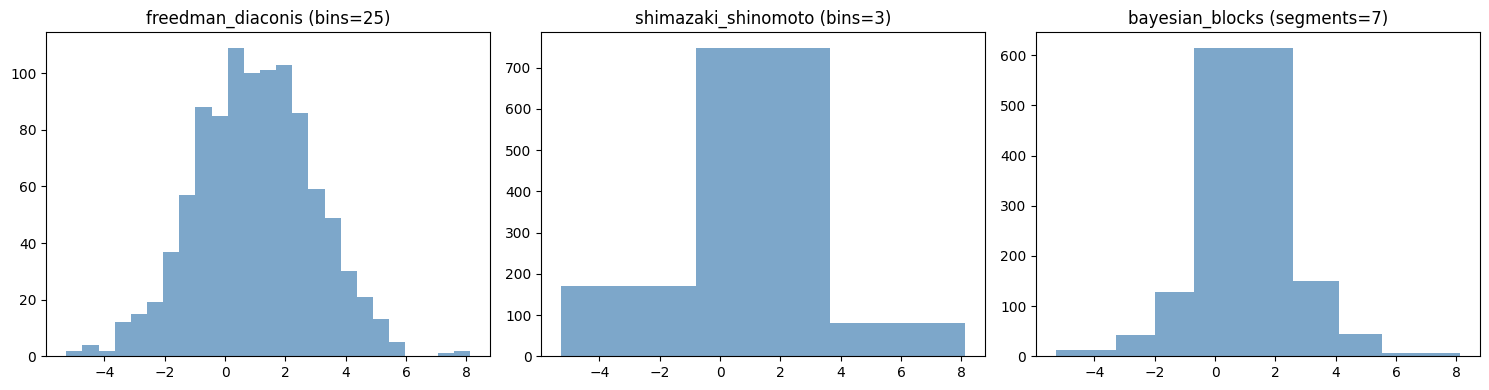

{'freedman_diaconis': 25, 'shimazaki_shinomoto': 3, 'bayesian_blocks': array([-5.26530692, -3.29115257, -1.98682335, -0.7085562 ,  2.57030912,
        4.09943957,  5.53308789,  8.11625709])}

BEST choice (via CV log-likelihood):
{'best': ('bayesian_blocks', array([-5.26530692, -3.29115257, -1.98682335, -0.7085562 ,  2.57030912,
        4.09943957,  5.53308789,  8.11625709]), -2.0841895006433395), 'all_scores': {'freedman_diaconis': -2.159774748232693, 'shimazaki_shinomoto': -2.2195147678685787, 'bayesian_blocks': -2.0841895006433395}}


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from astropy.stats import bayesian_blocks

# ================================================================
# Classical rules
# ================================================================
def freedman_diaconis_bins(x: np.ndarray) -> int:
    x = np.asarray(x)
    iqr = np.subtract(*np.percentile(x, [75, 25]))
    h = 2 * iqr * len(x) ** (-1/3)
    if h <= 0:
        return int(np.sqrt(len(x)))  # fallback
    return int(np.ceil((x.max() - x.min()) / h))

def shimazaki_shinomoto_bins(x: np.ndarray, min_bins: int = 2, max_bins: int = 100) -> int:
    x = np.asarray(x)
    N = len(x)
    bins_range = range(min_bins, max_bins+1)
    costs = []
    for k in bins_range:
        edges = np.linspace(x.min(), x.max(), k+1)
        counts, _ = np.histogram(x, edges)
        mean = counts.mean()
        var = counts.var()
        cost = (2 * mean - var) / (N**2)
        costs.append(cost)
    return bins_range[np.argmin(costs)]

# ================================================================
# Cross-validated log-likelihood scoring
# ================================================================
def _cv_loglik(x, bins_or_edges, n_splits=5):
    x = np.asarray(x)
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []

    for train_idx, test_idx in kf.split(x):
        x_train, x_test = x[train_idx], x[test_idx]

        if isinstance(bins_or_edges, int):  # fixed bin count
            edges = np.linspace(x.min(), x.max(), bins_or_edges+1)
        else:  # already edges (Bayesian Blocks)
            edges = bins_or_edges

        counts, _ = np.histogram(x_train, bins=edges)
        pdf = counts / counts.sum() / np.diff(edges)

        pdf = np.clip(pdf, 1e-12, None)  # avoid log(0)

        bin_idx = np.searchsorted(edges, x_test, side="right") - 1
        bin_idx = np.clip(bin_idx, 0, len(pdf)-1)

        ll = np.mean(np.log(pdf[bin_idx]))
        scores.append(ll)

    return np.mean(scores)

# ================================================================
# Manual Bayesian Blocks (faithful Scargle DP)
# ================================================================
def bayesian_blocks_manual(x, gamma=None):
    """
    Bayesian Blocks (Scargle et al. 2013) dynamic programming.
    Works for continuous 1D data.
    """
    x = np.sort(np.asarray(x))
    N = x.size

    # Default prior penalty (Scargle eq. 21)
    if gamma is None:
        gamma = 4 - np.log(73.53 * N ** -0.478)

    # Cumulative counts
    count_vec = np.arange(1, N + 1)
    # Differences for block widths
    edges = np.concatenate(([x[0]], 0.5 * (x[1:] + x[:-1]), [x[-1]]))

    # Arrays
    best = np.zeros(N, dtype=float)
    last = np.zeros(N, dtype=int)

    for i in range(N):
        # Vector of start indices
        j = np.arange(i + 1)

        # Count in block j..i
        k = count_vec[i] - np.concatenate(([0], count_vec[j[:-1]]))
        # Width of block
        T = x[i] - x[j]
        T[T <= 0] = 1e-12

        # Fitness
        fit_vec = k * (np.log(k) - np.log(T))

        # DP recurrence
        if i == 0:
            A = fit_vec - gamma
        else:
            A = best[j - 1] + fit_vec - gamma
            A[0] = fit_vec[0] - gamma

        last[i] = j[np.argmax(A)]
        best[i] = np.max(A)

    # Backtrack
    change_points = []
    i = N - 1
    while i > 0:
        cp = last[i]
        change_points.append(cp)
        i = cp - 1
    change_points = change_points[::-1]

    return edges[np.r_[0, change_points, N]]

# ================================================================
# Wrapper
# ================================================================
def optimal_binning(x: np.ndarray, method: str = "auto", plot: bool = True):
    results = {}

    if method in ("fd", "auto", "best"):
        results["freedman_diaconis"] = freedman_diaconis_bins(x)
    if method in ("ss", "auto", "best"):
        results["shimazaki_shinomoto"] = shimazaki_shinomoto_bins(x)
    if method in ("bb", "auto", "best"):
        results["bayesian_blocks"] = bayesian_blocks(x)

    if method == "best":
        scores = {name: _cv_loglik(x, val) for name, val in results.items()}
        best_name = max(scores, key=scores.get)
        return {"best": (best_name, results[best_name], scores[best_name]),
                "all_scores": scores}

    if plot:
        n_plots = len(results)
        plt.figure(figsize=(5*n_plots, 4))
        for i, (name, val) in enumerate(results.items(), 1):
            plt.subplot(1, n_plots, i)
            if name == "bayesian_blocks":
                plt.hist(x, bins=val, color="steelblue", alpha=0.7)
                plt.title(f"{name} (segments={len(val)-1})")
            else:
                plt.hist(x, bins=val, color="steelblue", alpha=0.7)
                plt.title(f"{name} (bins={val})")
        plt.tight_layout()
        plt.show()

    return results

# ================================================================
# Example
# ================================================================
if __name__ == "__main__":
    data = np.random.randn(1000) * 2 + 1
    print("AUTO comparison:")
    res = optimal_binning(data, method="auto", plot=True)
    print(res)

    print("\nBEST choice (via CV log-likelihood):")
    best = optimal_binning(data, method="best", plot=False)
    print(best)


Testing with different types of data:

1. Normal Distribution (n=1000)
Optimal Number of Bins by Different Methods:
---------------------------------------------
Sturges             :  11 bins
Scott               :  21 bins
Freedman-Diaconis   :  28 bins
Square Root         :  32 bins
Doane               :  13 bins
Cross-Validation    :  31 bins
BIC                 :   9 bins
BB Events           :   7 bins
BB Regular          :  58 bins
BB Measures         :   1 bins
Ensemble            :  15 bins
---------------------------------------------
Recommended (Ensemble): 15 bins


2. Skewed Distribution (n=500)
Optimal Number of Bins by Different Methods:
---------------------------------------------
Sturges             :  10 bins
Scott               :  17 bins
Freedman-Diaconis   :  28 bins
Square Root         :  23 bins
Doane               :  15 bins
Cross-Validation    :  21 bins
BIC                 :   8 bins
BB Events           :   5 bins
BB Regular          :  24 bins
BB Measures     

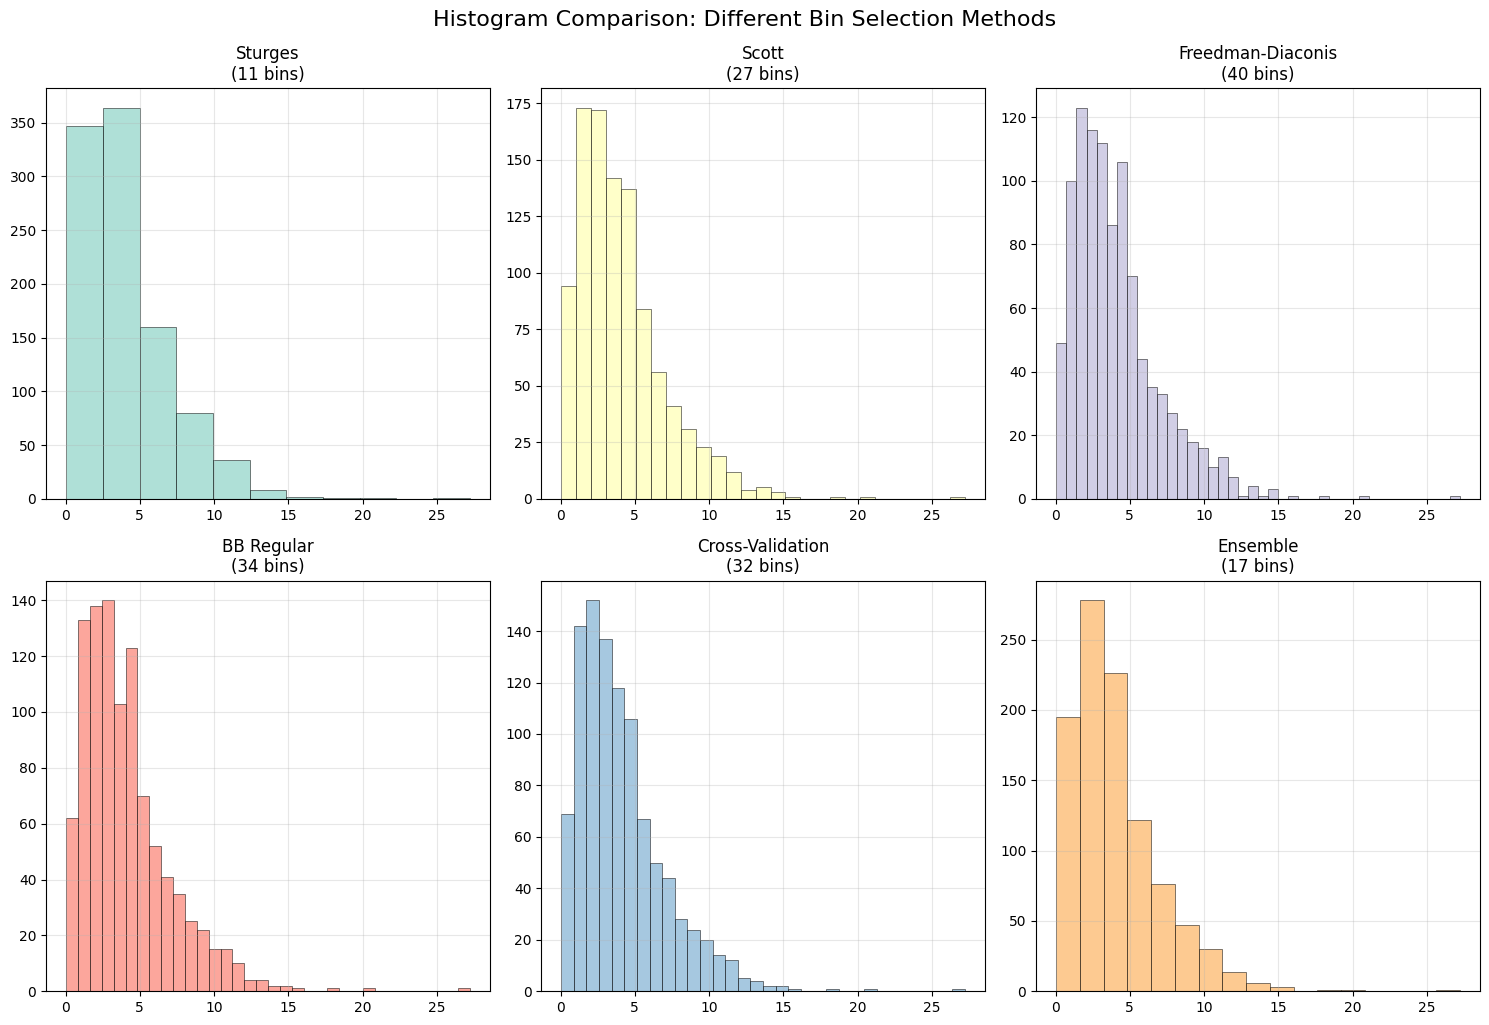

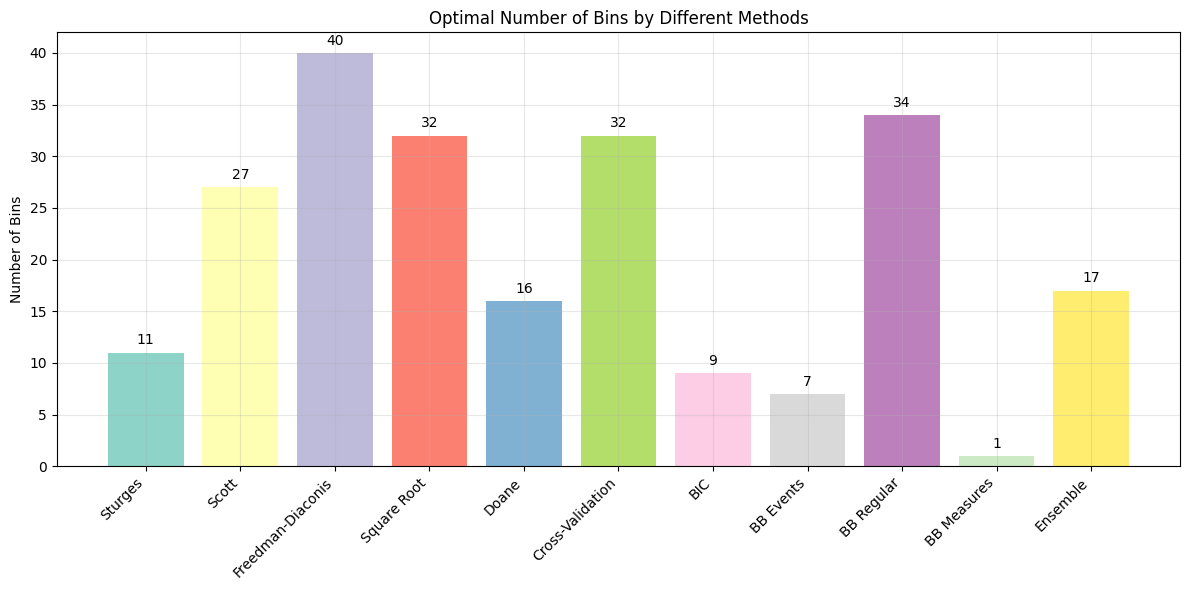

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KernelDensity
from typing import Optional, Union
from collections.abc import Iterable
import warnings
warnings.filterwarnings('ignore')

ArrayLike = Union[np.ndarray, Iterable[float]]


def find_optimal_bins(data, max_bins=100, plot=True, verbose=True):
    """
    Find optimal number of bins using multiple state-of-the-art methods.
    
    Parameters:
    - data: array-like, the dataset
    - max_bins: int, maximum number of bins to test
    - plot: bool, whether to show plots
    - verbose: bool, whether to print results
    
    Returns:
    - dict with optimal bins for each method
    """
    
    data = np.asarray(data).flatten()
    data = data[~np.isnan(data)]  # Remove NaN values
    n = len(data)
    
    if n == 0:
        raise ValueError("Data contains no valid values")
    
    results = {}
    
    # 1. Sturges' Rule (classic)
    sturges = int(np.ceil(np.log2(n) + 1))
    results['Sturges'] = sturges
    
    # 2. Scott's Rule (based on standard deviation)
    h_scott = 3.5 * np.std(data) / (n ** (1/3))
    scott = int(np.ceil((np.max(data) - np.min(data)) / h_scott))
    results['Scott'] = max(1, min(scott, max_bins))
    
    # 3. Freedman-Diaconis Rule (robust to outliers)
    q75, q25 = np.percentile(data, [75, 25])
    iqr = q75 - q25
    if iqr > 0:
        h_fd = 2 * iqr / (n ** (1/3))
        fd = int(np.ceil((np.max(data) - np.min(data)) / h_fd))
        results['Freedman-Diaconis'] = max(1, min(fd, max_bins))
    else:
        results['Freedman-Diaconis'] = sturges
    
    # 4. Square Root Rule
    sqrt_rule = int(np.ceil(np.sqrt(n)))
    results['Square Root'] = sqrt_rule
    
    # 5. Doane's Rule (extension of Sturges for skewed data)
    g1 = stats.skew(data)
    sigma_g1 = np.sqrt(6 * (n - 2) / ((n + 1) * (n + 3)))
    doane = int(np.ceil(np.log2(n) + 1 + np.log2(1 + abs(g1) / sigma_g1)))
    results['Doane'] = doane
    
    # 6. Cross-Validation Method (computationally intensive but robust)
    bin_range = range(max(2, int(n**0.3)), min(max_bins, int(n**0.6)))
    cv_scores = []
    
    for k in bin_range:
        try:
            # Create histogram and use it as basis for KDE evaluation
            hist, edges = np.histogram(data, bins=k, density=True)
            bin_centers = (edges[:-1] + edges[1:]) / 2
            
            # Weighted score based on histogram smoothness and data fit
            # Penalize both underfitting (too few bins) and overfitting (too many bins)
            smoothness = -np.sum(np.diff(hist)**2)  # Prefer smoother histograms
            coverage = np.sum(hist > 0) / len(hist)  # Prefer good data coverage
            
            # Combine metrics with penalty for extreme bin counts
            penalty = abs(k - np.sqrt(n)) / np.sqrt(n)  # Penalize deviation from sqrt(n)
            score = smoothness + coverage - penalty
            cv_scores.append(score)
            
        except:
            cv_scores.append(-np.inf)
    
    if cv_scores:
        cv_optimal = bin_range[np.argmax(cv_scores)]
        results['Cross-Validation'] = cv_optimal
    else:
        results['Cross-Validation'] = sturges
    
    # 7. Fixed BIC approach using proper multinomial likelihood
    def compute_bic_optimal(data, max_bins_test):
        """
        Compute BIC for histogram model selection using proper likelihood.
        """
        N = len(data)
        min_bins_test = max(2, int(np.log2(N)))  # Start from reasonable minimum
        
        bic_scores = []
        
        for k in range(min_bins_test, max_bins_test + 1):
            try:
                # Create histogram
                hist, _ = np.histogram(data, bins=k, density=False)
                
                # Log-likelihood for multinomial distribution
                # Remove empty bins to avoid log(0)
                observed = hist[hist > 0]
                
                if len(observed) >= 2:
                    # Log-likelihood: sum of n_i * log(p_i) where p_i = n_i/N
                    log_likelihood = np.sum(observed * np.log(observed / N))
                    
                    # BIC = -2 * log_likelihood + (k-1) * log(N)
                    # k-1 parameters for multinomial (probabilities sum to 1)
                    bic = -2 * log_likelihood + (k - 1) * np.log(N)
                    bic_scores.append(bic)
                else:
                    bic_scores.append(np.inf)
                    
            except (ValueError, RuntimeWarning):
                bic_scores.append(np.inf)
        
        if bic_scores and not all(np.isinf(bic_scores)):
            bic_optimal_idx = np.argmin(bic_scores)
            bic_optimal = bic_optimal_idx + min_bins_test
            return max(2, min(bic_optimal, max_bins))
        else:
            return sturges
    
    # Compute BIC with reasonable range
    max_bins_bic = min(max_bins, int(2 * np.sqrt(n)))
    results['BIC'] = compute_bic_optimal(data, max_bins_bic)
    
    # 8. Fixed Bayesian Blocks implementation
    def _fitness_args_of(func):
        return func.__code__.co_varnames[: func.__code__.co_argcount]

    class FitnessFunc:
        def __init__(self, p0: float = 0.05, gamma: Optional[float] = None, ncp_prior: Optional[float] = None) -> None:
            self.p0 = p0
            self.gamma = gamma
            self.ncp_prior = ncp_prior

        def validate_input(self, t: ArrayLike, x: Optional[ArrayLike] = None, sigma: Optional[Union[ArrayLike, float]] = None):
            t = np.asarray(t, dtype=float)
            if t.ndim != 1 or t.size == 0:
                raise ValueError("t must be non-empty 1D array")
            unq_t, unq_ind, unq_inv = np.unique(t, return_index=True, return_inverse=True)

            if x is None:
                if sigma is not None:
                    raise ValueError("If sigma is provided, x must be provided for 'measures'.")
                sigma = 1.0
                if unq_t.size == t.size:
                    x = np.ones_like(unq_t)
                else:
                    x = np.bincount(unq_inv).astype(float)
                t = unq_t
            else:
                x = np.asarray(x, dtype=float)
                if x.shape not in [(), (1,), (t.size,)]:
                    raise ValueError("x shape must be scalar or match t")
                if unq_t.size != t.size:
                    raise ValueError("Repeated values in t not supported when x is provided")
                t = unq_t
                x = x[unq_ind] if x.shape == (t.size,) else np.full_like(t, float(x))

            if sigma is None:
                sigma = 1.0
            sigma = np.asarray(sigma, dtype=float)
            if sigma.shape not in [(), (1,), (t.size,)]:
                raise ValueError("sigma shape must be scalar or match t/x")
            if sigma.shape != (t.size,):
                sigma = np.full_like(t, float(sigma))
            return t, x, sigma

        def p0_prior(self, N: int) -> float:
            return 4.0 - np.log(73.53 * self.p0 * (N ** -0.478))

        def compute_ncp_prior(self, N: int) -> float:
            if self.ncp_prior is not None:
                return float(self.ncp_prior)
            if self.gamma is not None:
                return -np.log(float(self.gamma))
            if self.p0 is not None:
                return float(self.p0_prior(N))
            raise ValueError("Cannot compute ncp_prior: set p0 or gamma or ncp_prior.")

        @property
        def _fitness_args(self):
            return _fitness_args_of(self.fitness)

        def fitness(self, **kwargs) -> np.ndarray:
            raise NotImplementedError

        def fit(self, t: ArrayLike, x: Optional[ArrayLike] = None, sigma: Optional[Union[ArrayLike, float]] = None) -> np.ndarray:
            t, x, sigma = self.validate_input(t, x, sigma)

            if "a_k" in self._fitness_args:
                a_raw = 1.0 / (sigma * sigma)
            if "b_k" in self._fitness_args:
                b_raw = x / (sigma * sigma)
            if "c_k" in self._fitness_args:
                c_raw = (x * x) / (sigma * sigma)

            edges = np.concatenate([t[:1], 0.5 * (t[1:] + t[:-1]), t[-1:]])
            block_len_from_right = t[-1] - edges

            N = t.size
            best = np.zeros(N, dtype=float)
            last = np.zeros(N, dtype=int)
            ncp_prior = self.compute_ncp_prior(N)

            for R in range(N):
                kw = {}
                if "T_k" in self._fitness_args:
                    kw["T_k"] = block_len_from_right[: R + 1] - block_len_from_right[R + 1]
                if "N_k" in self._fitness_args:
                    kw["N_k"] = np.cumsum(x[: R + 1][::-1])[::-1]
                if "a_k" in self._fitness_args:
                    kw["a_k"] = 0.5 * np.cumsum(a_raw[: R + 1][::-1])[::-1]
                if "b_k" in self._fitness_args:
                    kw["b_k"] = -np.cumsum(b_raw[: R + 1][::-1])[::-1]
                if "c_k" in self._fitness_args:
                    kw["c_k"] = 0.5 * np.cumsum(c_raw[: R + 1][::-1])[::-1]

                fit_vec = self.fitness(**kw)
                A_R = fit_vec - ncp_prior
                if R > 0:
                    A_R[1:] += best[:R]

                i_max = int(np.argmax(A_R))
                last[R] = i_max
                best[R] = A_R[i_max]

            cps = []
            ind = N
            while ind > 0:
                cps.append(ind)
                ind = last[ind - 1]
                if ind == 0:
                    cps.append(0)
                    break
            cps = np.array(cps[::-1], dtype=int)
            return edges[cps]

    class Events(FitnessFunc):
        def fitness(self, N_k: np.ndarray, T_k: np.ndarray) -> np.ndarray:
            out = np.zeros_like(N_k, dtype=float)
            mask = N_k > 0
            rate = np.divide(N_k, T_k, out=np.zeros_like(N_k, dtype=float), where=mask)
            ln_rate = np.zeros_like(N_k, dtype=float)
            np.log(rate, out=ln_rate, where=mask)
            np.multiply(N_k, ln_rate, out=out, where=mask)
            return out

        def validate_input(self, t, x, sigma):
            t, x, sigma = super().validate_input(t, x, sigma)
            if x is not None and (np.any(x < 0) or np.any(x % 1 != 0)):
                raise ValueError("For 'events', x must be non-negative integer counts.")
            return t, x, sigma

    class RegularEvents(FitnessFunc):
        def __init__(self, dt: float, p0: float = 0.05, gamma: Optional[float] = None, ncp_prior: Optional[float] = None) -> None:
            if dt <= 0:
                raise ValueError("dt must be positive for 'regular_events'.")
            self.dt = float(dt)
            super().__init__(p0=p0, gamma=gamma, ncp_prior=ncp_prior)

        def validate_input(self, t, x=None, sigma=None):
            t, x, sigma = super().validate_input(t, x, sigma)
            if x is not None and not np.all((x == 0) | (x == 1)):
                raise ValueError("'regular_events' requires x in {0,1}.")
            return t, x, sigma

        def fitness(self, T_k: np.ndarray, N_k: np.ndarray) -> np.ndarray:
            M_k = T_k / self.dt
            eps = 1e-12
            q = np.clip(N_k / np.maximum(M_k, eps), eps, 1 - eps)
            return N_k * np.log(q) + (M_k - N_k) * np.log(1 - q)

    class PointMeasures(FitnessFunc):
        def fitness(self, a_k: np.ndarray, b_k: np.ndarray) -> np.ndarray:
            return (b_k * b_k) / (4.0 * a_k)

        def validate_input(self, t, x, sigma):
            if x is None:
                raise ValueError("'measures' requires x (and optionally sigma).")
            return super().validate_input(t, x, sigma)

    def bayesian_blocks(t: ArrayLike, x: Optional[ArrayLike] = None, sigma: Optional[Union[ArrayLike, float]] = None,
                        fitness: Union[str, FitnessFunc] = "events", **kwargs) -> np.ndarray:
        FITNESS = {"events": Events, "regular_events": RegularEvents, "measures": PointMeasures}
        fitcls_or_obj = FITNESS.get(fitness, fitness)
        if isinstance(fitcls_or_obj, type) and issubclass(fitcls_or_obj, FitnessFunc):
            fitfunc = fitcls_or_obj(**kwargs)
        elif isinstance(fitcls_or_obj, FitnessFunc):
            fitfunc = fitcls_or_obj
        else:
            raise ValueError("fitness must be 'events', 'regular_events', 'measures', a FitnessFunc subclass, or instance.")
        return fitfunc.fit(t, x, sigma)
    
    # Fixed Bayesian Blocks computation - convert edges to number of bins
    def compute_bb_bins(data, fitness_type, **kwargs):
        """Helper function to compute BB bins and convert to integer bin count"""
        try:
            edges = bayesian_blocks(data, fitness=fitness_type, **kwargs)
            # Convert edges to number of bins
            num_bins = len(edges) - 1
            return max(1, min(num_bins, max_bins))
        except Exception as e:
            if verbose:
                print(f"Warning: {fitness_type} Bayesian Blocks failed: {e}")
            return sturges
    
    # Compute Bayesian Blocks variants with proper error handling
    results['BB Events'] = compute_bb_bins(data, 'events', p0=0.05)
    
    # For regular events, create binary data (0/1) based on threshold
    # Create binary data for regular events (above/below median)
    binary_data = (data > np.median(data)).astype(int)
    data_range = np.max(data) - np.min(data)
    dt = data_range / len(data) if len(data) > 1 else 1.0
    results['BB Regular'] = compute_bb_bins(data, 'regular_events', dt=dt, p0=0.05)

    # For measures, use data with its mean and std
    # Use sorted data for measures
    sorted_data = np.sort(data)
    x_measures = np.full_like(sorted_data, np.mean(data))
    sigma_measures = np.std(data)
    if sigma_measures == 0:
        sigma_measures = 1.0
    results['BB Measures'] = compute_bb_bins(sorted_data, 'measures', 
                                            x=x_measures, sigma=sigma_measures, p0=0.05)

    
    # Calculate ensemble recommendation (weighted average of methods)
    weights = {
        'Freedman-Diaconis': 0.2,   # Robust to outliers
        'BIC': 0.15,                # Model selection based
        'Cross-Validation': 0.1,    # Data-driven
        'BB Events': 0.08,          # Events-based BB
        'Scott': 0.07,              # Standard deviation based
        'BB Measures': 0.05,        # Point measures BB
        'Doane': 0.04,              # Accounts for skewness
        'BB Regular': 0.03,         # Regular events BB
        'Square Root': 0.02,        # Simple baseline
        'Sturges': 0.01             # Historical baseline
    }
    
    ensemble = int(np.round(sum(results[method] * weights[method] 
                                for method in weights.keys())))
    results['Ensemble'] = max(1, min(ensemble, max_bins))
    
    if verbose:
        print("Optimal Number of Bins by Different Methods:")
        print("-" * 45)
        for method, bins in results.items():
            print(f"{method:20}: {bins:3d} bins")
        print("-" * 45)
        print(f"Recommended (Ensemble): {results['Ensemble']} bins")
    
    if plot:
        # Create visualization
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        axes = axes.flatten()
        
        methods_to_plot = ['Sturges', 'Scott', 'Freedman-Diaconis', 
                          'BB Regular', 'Cross-Validation', 'Ensemble']
        
        for i, method in enumerate(methods_to_plot):
            if i < len(axes) and method in results:
                axes[i].hist(data, bins=results[method], alpha=0.7, 
                           color=plt.cm.Set3(i), edgecolor='black', linewidth=0.5)
                axes[i].set_title(f'{method}\n({results[method]} bins)')
                axes[i].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.suptitle('Histogram Comparison: Different Bin Selection Methods', 
                    fontsize=16, y=1.02)
        plt.show()
        
        # Show method comparison
        methods = list(results.keys())
        bins = list(results.values())
        
        plt.figure(figsize=(12, 6))
        bars = plt.bar(methods, bins, color=plt.cm.Set3(np.linspace(0, 1, len(methods))))
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Number of Bins')
        plt.title('Optimal Number of Bins by Different Methods')
        plt.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar, value in zip(bars, bins):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    str(value), ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
    
    return results

# Example usage and testing
if __name__ == "__main__":
    # Generate sample datasets
    np.random.seed(42)
    
    print("Testing with different types of data:\n")
    
    # Test 1: Normal distribution
    print("1. Normal Distribution (n=1000)")
    normal_data = np.random.normal(0, 1, 1000)
    results_normal = find_optimal_bins(normal_data, verbose=True, plot=False)
    
    print("\n" + "="*50 + "\n")
    
    # Test 2: Skewed distribution
    print("2. Skewed Distribution (n=500)")
    skewed_data = np.random.exponential(2, 500)
    results_skewed = find_optimal_bins(skewed_data, verbose=True, plot=False)
    
    print("\n" + "="*50 + "\n")
    
    # Test 3: Bimodal distribution
    print("3. Bimodal Distribution (n=800)")
    bimodal_data = np.concatenate([
        np.random.normal(-2, 0.5, 400),
        np.random.normal(2, 0.5, 400)
    ])
    results_bimodal = find_optimal_bins(bimodal_data, verbose=True, plot=False)
    
    # Quick example with plotting
    print("\n" + "="*50)
    print("\nExample with visualization:")
    sample_data = np.random.gamma(2, 2, 1000)  # Gamma distribution
    optimal_bins = find_optimal_bins(sample_data, max_bins=50)